### Problem 3


In [1]:
# %load ../standard_import.txt
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.linear_model as skl_lm

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn.metrics import confusion_matrix, classification_report, precision_score, mean_squared_error, accuracy_score
from sklearn import preprocessing
from sklearn import neighbors

from sklearn.model_selection import train_test_split, LeaveOneOut, KFold, cross_val_score
from sklearn.preprocessing import PolynomialFeatures


import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline
plt.style.use("seaborn-v0_8") 

### a) Generate a simulated data set as follows:

In [2]:
np.random.seed(42)
mu, sigma = 0, 1 # mean and standard deviation
x = np.random.normal(mu, sigma, 100)
n = np.random.normal(mu, sigma, 100)
y = x - 2*x**2+n

### b) Create a scatterplot of X against Y . Comment on what you find.

Text(0, 0.5, 'Y')

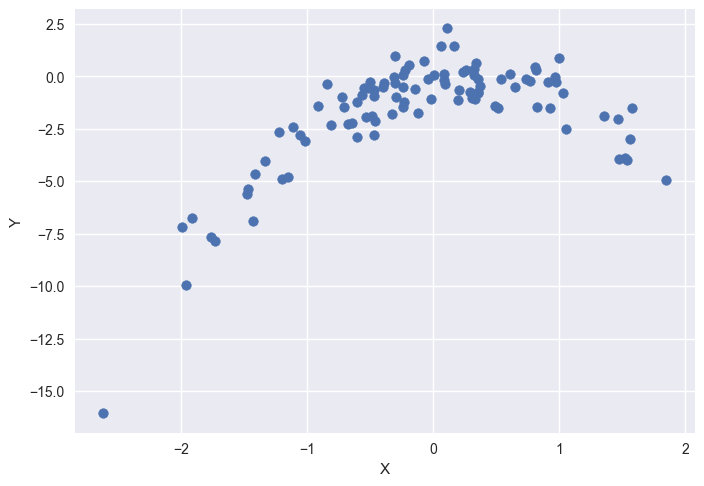

In [3]:
%matplotlib inline
plt.scatter( x, y)
plt.xlabel('X')
plt.ylabel('Y')


### c) Set a random seed, and then compute the LOOCV errors that result from fitting the following four models using least squares:

In [4]:
#Derivation Function call
def Calc_loocv_error(x, y, regr):
    loocv = LeaveOneOut()
    errors = []
    for train_index, test_index in loocv.split(x):
        x_train, x_test = x[train_index], x[test_index]
        y_train, y_test = y[train_index], y[test_index]
        regr.fit(x_train, y_train)
        coefficients = regr.coef_
        #print(coefficients) #Uncomment this to see the coefficients
        y_pred = regr.predict(x_test.reshape(1, -1))
        error = mean_squared_error(y_test, y_pred)
        errors.append(error)
    return np.mean(errors)

###

In [5]:
# Set random seed (42)
np.random.seed(42)

#----------------------------------------------------------
# Given data
mu, sigma = 0, 1
x = np.random.normal(mu, sigma, 100)
n = np.random.normal(mu, sigma, 100)
y = x - 2 * x**2 + n
#-----------------------------------------------------------



# Define degrees for polynomial regression models
degrees = [1, 2, 3, 4, 5, 6, 7]

# Compute LOOCV errors for each model
for degree in degrees:
    poly_features = PolynomialFeatures(degree=degree)
    x_poly = poly_features.fit_transform(x.reshape(-1, 1))
    regr = skl_lm.LinearRegression()
    loocv_error = Calc_loocv_error(x_poly, y, regr)
    print(f"Degree {degree} Polynomial: LOOCV Error = {loocv_error:}")


Degree 1 Polynomial: LOOCV Error = 5.302956627689594
Degree 2 Polynomial: LOOCV Error = 0.9127641950599265
Degree 3 Polynomial: LOOCV Error = 0.956957297774952
Degree 4 Polynomial: LOOCV Error = 0.9727724672791456
Degree 5 Polynomial: LOOCV Error = 1.5343128197581897
Degree 6 Polynomial: LOOCV Error = 4.663132477358613
Degree 7 Polynomial: LOOCV Error = 8.737679597463615


### d) Repeat (c) using another random seed, and report your results. Are your results the same as what you got in (c)? Why?

In [6]:
# Set random seed (80)
np.random.seed(10)

#----------------------------------------------------------
# Given data
mu, sigma = 0, 1
x = np.random.normal(mu, sigma, 100)
n = np.random.normal(mu, sigma, 100)
y = x - 2 * x**2 + n
#-----------------------------------------------------------


# Define degrees for polynomial regression models
degrees = [1, 2, 3, 4, 5, 6, 7]

# Compute LOOCV errors for each model
for degree in degrees:
    poly_features = PolynomialFeatures(degree=degree)
    x_poly = poly_features.fit_transform(x.reshape(-1, 1))
    regr = skl_lm.LinearRegression()
    loocv_error = Calc_loocv_error(x_poly, y, regr)
    print(f"Degree {degree} Polynomial: LOOCV Error = {loocv_error:}")


Degree 1 Polynomial: LOOCV Error = 9.429508728455424
Degree 2 Polynomial: LOOCV Error = 1.0376998969927405
Degree 3 Polynomial: LOOCV Error = 1.0710664600733875
Degree 4 Polynomial: LOOCV Error = 1.092551079915061
Degree 5 Polynomial: LOOCV Error = 1.115553736672735
Degree 6 Polynomial: LOOCV Error = 1.1296276012892337
Degree 7 Polynomial: LOOCV Error = 1.1873677348117122
